# kNN

## Imports

In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## Preprocessing

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_size = 5000
test_size = 1000

train_images_flat = train_images[:train_size].reshape(train_size, -1) / 255.0
test_images_flat = test_images[:test_size].reshape(test_size, -1) / 255.0
train_labels_int = train_labels[:train_size]
test_labels_int = test_labels[:test_size]

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_images_flat)
test_scaled = scaler.transform(test_images_flat)

## Training

### Training Loop

In [ ]:
print("Training K-Nearest Neighbors...")

knn = KNeighborsClassifier(
    n_neighbors = 3,
    weights = 'distance',
    algorithm = 'auto',
    p = 2,                  ## 1 Manhattan, 2 educlidean
    n_jobs = -1
    )

knn.fit(train_scaled, train_labels_int)

Training K-Nearest Neighbors...


KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

### Prediction

In [8]:
predictions = knn.predict(test_scaled)
accuracy = accuracy_score(test_labels_int, predictions)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels_int, predictions))


Accuracy: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        85
           1       0.91      0.99      0.95       126
           2       0.93      0.86      0.90       116
           3       0.84      0.88      0.86       107
           4       0.91      0.87      0.89       110
           5       0.92      0.78      0.84        87
           6       0.93      0.93      0.93        87
           7       0.83      0.86      0.85        99
           8       0.82      0.79      0.80        89
           9       0.81      0.83      0.82        94

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



## Visualization

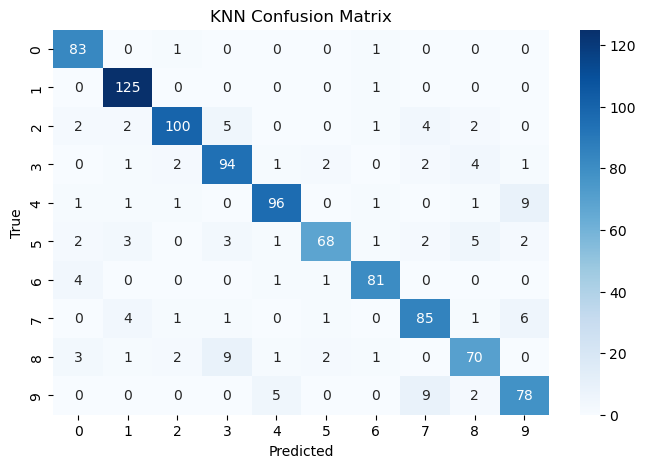

In [ ]:
cm = confusion_matrix(test_labels_int, predictions)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()